### Preliminaries

**Start importing these python modules**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Check which version of pandas i'm using**

In [31]:
print(pd.__version__)

2.2.2


### The Conceptual Model

Pandas provides 2 datatypes:The DataFrame and The Series

DataFrame is a two-dimensional table of data with column and row indexes(something like a spread sheet.)The cols are made up of series objects

**Series**

A series is an ordered ,one-dimensional array of data with an index.All the data is of the same datatype.Series arithmetic is vectorized after first aligning the series index for each of the operands.

**Examples of series arithmetic**

In [32]:
s1=pd.Series(range(0,4))
s1

0    0
1    1
2    2
3    3
dtype: int64

This creates a sequence of numbers starting from 0 up to (but not including) 4

In [33]:
s2=pd.Series(range(1,5))
s2

0    1
1    2
2    3
3    4
dtype: int64

This creates a sequence of numbers starting from 1 up to (but not including) 5.

In [34]:
s3=s1+s2
s3

0    1
1    3
2    5
3    7
dtype: int64

creates the series which is sum of both series elements

**creating two Pandas Series with the same values [1, 2, 3] but different index orders.**

In [35]:
s4=pd.Series([1,2,3],index=[0,1,2])
s4

0    1
1    2
2    3
dtype: int64

In [36]:
s5=pd.Series([1,2,3],index=[2,1,0])
s5

2    1
1    2
0    3
dtype: int64

| Series | Index Order | Values Assigned |
| ------ | ----------- | --------------- |
| s4     | 0, 1, 2     | 1, 2, 3         |
| s5     | 2, 1, 0     | 1, 2, 3         |


In [37]:
s6=s4+s5
s6

0    4
1    4
2    4
dtype: int64

🧮 How Addition Works in Pandas Series:
Pandas adds elements by matching index labels, not by position.

| Index | s4 Value | s5 Value | Sum |
| ----- | -------- | -------- | --- |
| 0     | 1        | 3        | 4   |
| 1     | 2        | 2        | 4   |
| 2     | 3        | 1        | 4   |


In [38]:
s7=pd.Series([1,2,3],index=[1,2,3])
s7

1    1
2    2
3    3
dtype: int64

In [39]:
s8=pd.Series([1,2,3],index=[0,1,2])
s8

0    1
1    2
2    3
dtype: int64

🧮 Addition: s9 = s7 + s8
Addition happens by matching index labels. Let’s align the indices:

| Index | s7 Value | s8 Value | s7 + s8 |
| ----- | -------- | -------- | ------- |
| 0     | —        | 1        | NaN     |
| 1     | 1        | 2        | 3       |
| 2     | 2        | 3        | 5       |
| 3     | 3        | —        | NaN     |


In [40]:
s9=s7+s8
s9

0    NaN
1    3.0
2    5.0
3    NaN
dtype: float64

### Get your data into DataFrame

**Instantiate the DataFrame**

In [41]:
df1=pd.DataFrame() #Empty dataframe
df1


""


In [42]:
# Define the dictionary first
python_dictionary = {
    'Name': ['Devika', 'Ashika', 'Kavya'],
    'Age': [22, 23, 21],
    'Branch': ['CSE', 'ECE', 'ISE']
}
# Create DataFrame from python_dictionary
df2=pd.DataFrame(python_dictionary)
df2

,Name,Age,Branch
0,Devika,22,CSE
1,Ashika,23,ECE
2,Kavya,21,ISE


In [43]:

# Define the NumPy array (matrix)
numpy_matrix = np.array([[10, 20], [30, 40], [50, 60]])

# Create DataFrame from NumPy matrix
df3=pd.DataFrame(numpy_matrix)
df3

,0,1
0,10,20
1,30,40
2,50,60


**Load a dataframe from a csv file**

In [44]:
df_csv = pd.read_csv('Books.csv', header=0, index_col=0, na_values=['na', '-', '.', ''])
df_csv

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...


| Column Name      | Meaning                                               |
| ---------------- | ----------------------------------------------------- |
| `author`         | Author(s) of the book                                 |
| `pages`          | Total number of pages                                 |
| `genre`          | Category like "Fiction", "Finance", "Reference", etc. |
| `description`    | Summary or blurb about the book                       |
| `published_date` | Year or date of publication                           |
| `publisher`      | Publishing company                                    |
| `language`       | Language (e.g., `"en"` for English)                   |
| `average_rating` | User rating (can be number or text like "No rating")  |
| `ratings_count`  | Number of users who rated it                          |
| `thumbnail`      | URL to the book's cover image thumbnail               |


| Argument          | What it does                                    |
| ----------------- | ----------------------------------------------- |
| `header=0`        | Uses the first row as column names              |
| `index_col=0`     | Uses the first column as the row index          |
| `na_values=[...]` | Converts listed symbols to missing values (NaN) |



In [45]:
df_csv.shape

(2049, 10)

2049 rows (books)

10 columns (data fields)

**Get your data from inline python csv text**

In [46]:
from io import StringIO
data=""",Animal,Cuteness,Desirable
A,       dog,     8.7,     True
B,       cat,     9.5,     False"""

df_inlinedata=pd.read_csv(StringIO(data),header=0,index_col=0,skipinitialspace=True)
df_inlinedata

,Animal,Cuteness,Desirable
A,dog,8.7,True
B,cat,9.5,False


| Parameter               | Meaning                                                            |
| ----------------------- | ------------------------------------------------------------------ |
| `StringIO(data)`        | Treats the `data` string like a CSV file.                          |
| `header=0`              | Uses the **first line** as column names.                           |
| `index_col=0`           | Uses the **first column** (which contains A and B) as the index.   |
| `skipinitialspace=True` | Strips any extra spaces **after commas** (e.g., `' dog' → 'dog'`). |


In [47]:
df_inlinedata.loc['A', 'Animal']     # Output: 'dog'



'dog'

In [48]:
df_inlinedata['Cuteness'].mean()     # Output: 9.1

9.1

**Also among many other options are there**


**1.Reading html string**

In [49]:

#Reading from html string
from io import StringIO
import pandas as pd

html_string = """
<table>
    <tr><th>Name</th><th>Age</th></tr>
    <tr><td>Devika</td><td>22</td></tr>
    <tr><td>Ashika</td><td>21</td></tr>
</table>
"""

df_html = pd.read_html(html_string)
df_htmlelement=df_html[0]
print(df_htmlelement)


     Name  Age
0  Devika   22
1  Ashika   21


C:\Users\Devik\AppData\Local\Temp\ipykernel_18568\3162421114.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_html = pd.read_html(html_string)


**2.Reading html using url**


In [50]:
pip install html5lib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [51]:
#Reading from html string
from io import StringIO
import pandas as pd

html_url= "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
df_html = pd.read_html(html_url)   # This gives you a list of DataFrames
df= df_html[0]               # Access the first table
print(df)

                                                   0
0  Largest economies in the world by GDP (nominal...


**Reading data from json**

In [52]:
import pandas as pd
import json
from io import StringIO
JSON_string=[{
    'name':'Devika',
    'age':21,
    'course':'Data Science'
}]
# Convert dict to a JSON string
json_text=json.dumps(JSON_string)
# Read it using read_json
df_json=pd.read_json(StringIO(json_text))
df_json

,name,age,course
0,Devika,21,Data Science


| You Have              | Use This                            |
| --------------------- | ----------------------------------- |
| Dict (flat key-value) | `pd.DataFrame.from_dict([dict])`    |
| JSON string (flat)    | Wrap it in a list + `read_json()`   |
| Already list of dicts | ✅ Works directly with `read_json()` |


In [53]:
import sqlite3
import pandas as pd

# 1. Create connection (in-memory for testing, or use a file)
connection = sqlite3.connect("my_database.db")  # or use ":memory:" for temporary DB

# 2. Create a table
connection.execute("""
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER
)
""")

# 3. Insert some data
connection.execute("INSERT INTO students (name, age) VALUES ('Devika', 21)")
connection.execute("INSERT INTO students (name, age) VALUES ('Ashika', 22)")
connection.commit()

# 4. Read the data
query = "SELECT * FROM students"
df_sql = pd.read_sql(query, connection)

# 5. Show the DataFrame
print(df_sql)

# 6. Close the connection (good practice)
connection.close()



   id    name  age
0   1  Devika   21
1   2  Ashika   22
2   3  Devika   21
3   4  Ashika   22


| Task             | Code                                                |
| ---------------- | --------------------------------------------------- |
| Connect to DB    | `sqlite3.connect("my_database.db")`                 |
| Create table     | `CREATE TABLE students (...)`                       |
| Insert records   | `INSERT INTO students (...)`                        |
| Read with pandas | `pd.read_sql("SELECT * FROM students", connection)` |


In [54]:
df_excel=pd.read_excel('1mb.xlsx')
df_excel

,Name,Email,Phone,Address,Company,Text,Description,Job Title
0,Austen Russel,rubye.bernhard@gmail.com,463.769.1464,"25577 Hailey Union\nPatton, LA 76017",Cartwright and Sons,Ducimus et suscipit esse temporibus nulla. Ut ...,Dolor amet sed maiores recusandae. Ut accusant...,Welfare Eligibility Clerk
1,Darion Marvin,orpha24@feil.com,+1-865-703-2210,929 Jenkins Gardens Apt. 568\nLake Jacklynside...,Schimmel Ltd,Ut doloribus earum ratione deleniti. Voluptas ...,Et sit saepe est magni sit velit ullam. Quia f...,Marine Architect
2,Lenny Jaskolski,flatley.cristal@yahoo.com,1-743-426-5249,"10645 Myrtis Glen Apt. 903\nNew Darrel, OK 919...",Lehner-Rowe,Hic velit perspiciatis neque animi ipsa suscip...,Quaerat mollitia rerum nam repellendus ipsa ne...,Bridge Tender OR Lock Tender
3,Dr. Demarco Nolan III,demetrius.harber@gmail.com,+1-281-763-9451,"219 Cortez Union\nMayerttown, AK 84988",Leffler-Abernathy,Sit tenetur explicabo quaerat. Odit similique ...,Id maiores nam non sequi a. Omnis voluptate no...,Forensic Investigator
4,Cyrus Braun,hills.schuyler@jerde.com,857-587-8694,"39984 Halvorson Ports\nRaeside, NC 55205-8071","Rolfson, Johnston and Gislason",Sit et aut consequatur voluptatem accusamus vo...,Voluptates ut ut rerum id occaecati facilis. E...,Pharmaceutical Sales Representative
...,...,...,...,...,...,...,...,...
3995,Wilfred Trantow,serenity.metz@weissnat.net,463.381.0970,"885 Mills Ville Apt. 825\nEast Evansport, CT 3...","Hand, Lang and Von",Et cum eaque hic provident quisquam sed dolor ...,Omnis fugit non ut facere illum. Eligendi veli...,Plant Scientist
3996,Mrs. Gail Dare,swift.kathryn@gmail.com,+1-281-443-4721,"984 Gusikowski Tunnel\nSouth Chloeberg, ID 995...",Friesen and Sons,Quae dignissimos non facere laudantium invento...,Deserunt eos ut sit quaerat suscipit eius pers...,Government Service Executive
3997,Shawn Crist III,muller.kaylee@yahoo.com,1-608-368-4133,31345 Parker Throughway Suite 338\nLake Vincen...,Medhurst-Welch,Eveniet sint ea delectus illo sit tempora volu...,Dolorem eius officia est omnis perferendis aut...,Recyclable Material Collector
3998,Alison Crist,matilda.crist@hotmail.com,(458) 239-0396,"44894 Treutel Avenue Apt. 333\nLacyfurt, NJ 97767",Ledner PLC,Corporis nostrum officia sequi aut odio except...,Voluptas suscipit maiores harum consequuntur. ...,Bellhop


| Code                        | What it does                        |
| --------------------------- | ----------------------------------- |
| `pd.read_excel('1mb.xlsx')` | Reads the Excel file as a DataFrame |
| `df_excel.head()`           | Shows first 5 rows                  |
| `df_excel.columns`          | Lists all column names              |
| `df_excel.shape`            | Tells number of rows and columns    |
| `df_excel['Age'] > 21`      | Filters rows where Age > 21         |


In [55]:
df_clipboard=pd.read_clipboard()
df_clipboard

,Great,"question,",Devika!,👏,You're,using,a,powerful,combination,of,**NumPy**,and,**Pandas**,to,create,a.1,**simulated,time-series-like,DataFrame**.
0,Let's,explain,this,line,by,line:,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,---,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,##,✅,Code:,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,```python,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,import,numpy,as,np,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,---,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
73,Let,me,know,if,you,want,to:,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
74,*,Add,a,datetime,index,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
75,*,Resample,the,data,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


✅ It will paste the copied Excel table into the DataFrame.

For this we need to copy excel data from any excel files 

 Method 1: From Excel
Open Excel.

Select a table (e.g., columns like Name, Age, City).

Press Ctrl+C (copy).
In your Jupyter notebook, run:
df_clipboard=pd.read_clipboard()
df_clipboard

**Fake up some random data-useful for testing**

In [56]:
import numpy as np
df_random=(pd.DataFrame(np.random.rand(1100,6),columns=list('ABCDEF'))-0.5).cumsum()

df_random

,A,B,C,D,E,F
0,0.381662,-0.456171,-0.143151,0.120526,-0.222010,-0.309998
1,-0.036394,-0.552313,-0.373004,-0.250337,-0.711417,-0.315641
2,0.302834,-0.983299,-0.544655,-0.334476,-1.191430,-0.709700
3,0.293942,-1.446026,-0.940661,-0.285010,-1.555530,-0.967127
4,-0.112343,-1.911171,-0.768982,-0.216560,-2.043238,-0.539200
...,...,...,...,...,...,...
1095,-12.490411,23.150288,-1.425036,13.287068,-5.243906,2.307728
1096,-12.342176,23.012730,-1.307731,12.971680,-5.449519,2.583034
1097,-12.558871,23.011804,-1.026055,12.480720,-5.035974,2.661396
1098,-12.354763,23.126415,-0.619489,12.573535,-5.037746,3.039555


<Axes: >

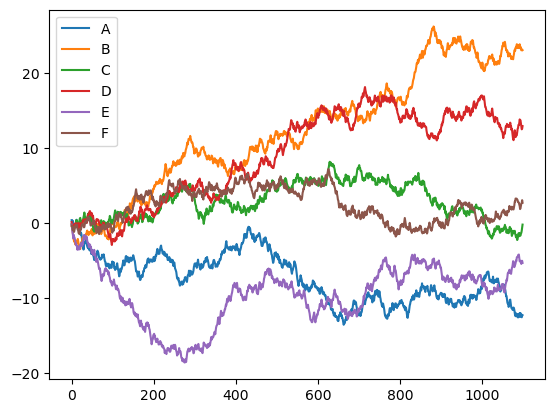

In [57]:
df_random.plot()



 ✅ Step-by-step Explanation
 🔹 `np.random.rand(1100, 6)`

* This generates a **NumPy array of random numbers** with:

  * **1100 rows**
  * **6 columns**
* Each value is a **float between 0 and 1**.

🔎 Example output:

```
array([[0.84, 0.23, ..., 0.67],
       [0.91, 0.44, ..., 0.50],
       ...
      ])
```

---

🔹 `pd.DataFrame(..., columns=list('ABCDEF'))`

* Converts the NumPy array into a **Pandas DataFrame**
* Columns are named `'A'`, `'B'`, `'C'`, `'D'`, `'E'`, `'F'`

🔎 Example:

| A    | B    | C   | D | E | F |
| ---- | ---- | --- | - | - | - |
| 0.84 | 0.23 | ... |   |   |   |
| 0.91 | 0.44 | ... |   |   |   |
| ...  | ...  | ... |   |   |   |

---

🔹 Subtracting `0.5`:

```python
... - 0.5
```

* Shifts all values from **\[0.0, 1.0]** to **\[-0.5, +0.5]**
* Now your values are centered around **0**

---

🔹 `.cumsum()`

```python
(...).cumsum()
```

* **Cumulative sum** applied **row by row** (like time series)
* For example, if column A has values: `0.1, -0.3, 0.2`, it becomes:

  ```
  0.1
  -0.2   ← 0.1 + (-0.3)
  0.0    ← -0.2 + 0.2
  ```

---

✅ Final Result: `df_random`

* A DataFrame of shape `(1100, 6)`
* Simulated data that **fluctuates up and down over time**
* Looks like **random walks** or **stock prices**

🔎 Sample head:

| A    | B     | C   | D | E | F |
| ---- | ----- | --- | - | - | - |
| 0.13 | 0.10  | ... |   |   |   |
| 0.20 | -0.15 | ... |   |   |   |
| ...  | ...   | ... |   |   |   |

---


In [58]:
df_random['Group']=[np.random.choice(list('abcd')) for _ in range(len(df_random))]
df_random

,A,B,C,D,E,F,Group
0,0.381662,-0.456171,-0.143151,0.120526,-0.222010,-0.309998,d
1,-0.036394,-0.552313,-0.373004,-0.250337,-0.711417,-0.315641,d
2,0.302834,-0.983299,-0.544655,-0.334476,-1.191430,-0.709700,a
3,0.293942,-1.446026,-0.940661,-0.285010,-1.555530,-0.967127,b
4,-0.112343,-1.911171,-0.768982,-0.216560,-2.043238,-0.539200,c
...,...,...,...,...,...,...,...
1095,-12.490411,23.150288,-1.425036,13.287068,-5.243906,2.307728,d
1096,-12.342176,23.012730,-1.307731,12.971680,-5.449519,2.583034,a
1097,-12.558871,23.011804,-1.026055,12.480720,-5.035974,2.661396,a
1098,-12.354763,23.126415,-0.619489,12.573535,-5.037746,3.039555,b


In [59]:
df_random['Date']=pd.date_range('1/1/2017',periods=len(df_random),freq='D')
df_random

,A,B,C,D,E,F,Group,Date
0,0.381662,-0.456171,-0.143151,0.120526,-0.222010,-0.309998,d,2017-01-01
1,-0.036394,-0.552313,-0.373004,-0.250337,-0.711417,-0.315641,d,2017-01-02
2,0.302834,-0.983299,-0.544655,-0.334476,-1.191430,-0.709700,a,2017-01-03
3,0.293942,-1.446026,-0.940661,-0.285010,-1.555530,-0.967127,b,2017-01-04
4,-0.112343,-1.911171,-0.768982,-0.216560,-2.043238,-0.539200,c,2017-01-05
...,...,...,...,...,...,...,...,...
1095,-12.490411,23.150288,-1.425036,13.287068,-5.243906,2.307728,d,2020-01-01
1096,-12.342176,23.012730,-1.307731,12.971680,-5.449519,2.583034,a,2020-01-02
1097,-12.558871,23.011804,-1.026055,12.480720,-5.035974,2.661396,a,2020-01-03
1098,-12.354763,23.126415,-0.619489,12.573535,-5.037746,3.039555,b,2020-01-04


### Saving a DataFrame

**Saving a dataframe to a csv file**

In [60]:
df_csv.to_csv('newcsv.csv',encoding='utf-8')

**Saving a dataframe to an excel workbook**

In [62]:
writer = pd.ExcelWriter('newexcel.xlsx')
df_excel.to_excel(writer, sheet_name='Sheet1')
writer.close()  # ✅ NOT writer.save()


**Saving a dataframe to a python object**

In [68]:
d=df_csv.to_dict()
d   #To a dictionary

{'author': {'Fictional Points of View': 'Peter Lamarque',
  'Science Fiction and Fantasy Literature': 'R. Reginald, Douglas Menville, Mary A. Burgess',
  'Library of Congress Subject Headings': 'Library of Congress',
  'Fictional Space in the Modernist and Post-modernist American Novel': 'Carl Darryl Malmgren',
  'Mestizos Come Home!': 'Robert Con Davis-Undiano',
  'Fictional Practice: Magic, Narration, and the Power of Imagination': 'Unknown Author',
  'Telling Lies in Modern American Autobiography': 'Timothy Dow Adams',
  'Essential Skills - Reading and Writing, Grade 1': 'Teacher Created Resources, Inc',
  "Pearson's Magazine": 'Unknown Author',
  'Reload': 'Mary Flanagan, Austin Booth',
  'Presented Discourse in Popular Science': 'Olga Pilkington',
  'Encyclopedia of the Novel': 'Paul Schellinger',
  'Idealism': 'Tyron Goldschmidt, Kenneth L. Pearce',
  "Boys' Life": 'Unknown Author',
  'The Philosophy of David Cronenberg': 'Simon Riches',
  "International Who's Who of Authors and 

In [67]:
m=df_csv.values
m  #To a numpy matrix

array([['Peter Lamarque', '252', 'Literary Criticism', ..., 'No rating',
        0,
        'http://books.google.com/books/content?id=rh-omr6laV0C&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['R. Reginald, Douglas Menville, Mary A. Burgess', '802',
        'Reference', ..., 'No rating', 0,
        'http://books.google.com/books/content?id=P8zW2AH6150C&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['Library of Congress. Cataloging Policy and Support Office',
        '1662', 'Subject headings, Library of Congress', ...,
        'No rating', 0,
        'http://books.google.com/books/content?id=pEhkh_9bP9wC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ...,
       ['Jack Canfield', '512', 'Self-Help', ..., '4.2', 100000,
        'http://books.google.com/books/content?id=7zL_DwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['Suze Orman', '448', 'Personal Finance', ..., '4.0', 40000,
        'http

### Pandas Dataframe

**Start importing python modules**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    #For Chart 

In [71]:
df_csv.info()   #Prints cols and datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, Fictional Points of View to The Money Manual
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          2049 non-null   object
 1   pages           2049 non-null   object
 2   genre           2049 non-null   object
 3   description     2049 non-null   object
 4   published_date  2049 non-null   object
 5   publisher       2049 non-null   object
 6   language        2049 non-null   object
 7   average_rating  2049 non-null   object
 8   ratings_count   2049 non-null   int64 
 9   thumbnail       2049 non-null   object
dtypes: int64(1), object(9)
memory usage: 176.1+ KB


In [74]:
dfh=df_csv.head(10)   #df.head(i)   get first i rows
dfh

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
Mestizos Come Home!,Robert Con Davis-Undiano,337,History,Uruguayan writer Eduardo Galeano has described...,2017-03-30,University of Oklahoma Press,en,No rating,0,http://books.google.com/books/content?id=fk1jD...
"Fictional Practice: Magic, Narration, and the Power of Imagination",Unknown Author,384,"Body, Mind & Spirit",To what extent were practitioners of magic ins...,2021-09-27,BRILL,en,No rating,0,http://books.google.com/books/content?id=NLJFE...
Telling Lies in Modern American Autobiography,Timothy Dow Adams,230,Literary Criticism,This collection of twelve essays discusses the...,1990-01-01,UNC Press Books,en,No rating,0,http://books.google.com/books/content?id=p6YBb...
"Essential Skills - Reading and Writing, Grade 1","Teacher Created Resources, Inc",178,Activity programs in education,No description available,2008-12,Teacher Created Resources,en,No rating,0,http://books.google.com/books/content?id=Gynn-...


In [75]:
dft=df_csv.tail(10)   #get last i rows
dft

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
The Millionaire Mind,Thomas J. Stanley,416,Personal Finance,Explores the mindset and habits of millionaire...,2000-02-01,Andrews McMeel Publishing,en,4.2,70000,http://books.google.com/books/content?id=8z4_D...
The Wealth Choice,Dennis Kimbro,304,Self-Help,Insights from successful African Americans on ...,2013-02-19,Palgrave Macmillan,en,4.3,20000,http://books.google.com/books/content?id=zv0oD...
The Behavior Gap,Carl Richards,208,Personal Finance,Explores how emotions lead to poor financial d...,2012-01-03,Portfolio,en,4.0,25000,http://books.google.com/books/content?id=7zL_D...
The Million Dollar Club,Kimberly Seals-Allers,256,Personal Finance,A guide for women of color to achieve financia...,2024-03-05,Amistad,en,4.2,15000,http://books.google.com/books/content?id=2c3_D...
The Art of Money,Bari Tessler,304,Personal Finance,"A holistic approach to financial management, b...",2016-06-14,Parallax Press,en,4.1,20000,http://books.google.com/books/content?id=3z3_D...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...
The Courage to Be Rich,Suze Orman,448,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,http://books.google.com/books/content?id=2c3_D...


In [78]:
dfs=df_csv.describe()   #summary stats for cols
dfs

,ratings_count
count,2049.000000
mean,3704.258663
std,40015.992383
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1000000.000000


In [80]:
top_left_corner_df=df_csv.iloc[:4,:4]   #.iloc[] is used for integer-location based indexing — it lets you select rows and columns by number
top_left_corner_df

,author,pages,genre,description
title,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec..."
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available


| Code                       | What It Does                               |
| -------------------------- | ------------------------------------------ |
| `df_csv.head()`            | Shows first 5 rows of **all** columns      |
| `df_csv.iloc[:4, :4]`      | Shows **first 4 rows and 4 columns**       |
| `df_csv.iloc[:4, [0, 2]]`  | Shows first 4 rows of columns 0 and 2 only |
| `df_csv.iloc[100:104, :4]` | Shows rows 100–103 and first 4 columns     |


**DataFrame non-indexing attributes**

In [81]:
df_transpose=df_csv.T    #Transpose rows and cols
df_transpose

title,Fictional Points of View,Science Fiction and Fantasy Literature,Library of Congress Subject Headings,Library of Congress Subject Headings,Fictional Space in the Modernist and Post-modernist American Novel,Mestizos Come Home!,"Fictional Practice: Magic, Narration, and the Power of Imagination",Telling Lies in Modern American Autobiography,"Essential Skills - Reading and Writing, Grade 1",Pearson's Magazine,...,The Millionaire Mind,The Wealth Choice,The Behavior Gap,The Million Dollar Club,The Art of Money,The Index Card,The Road to Wealth,The Success Principles,The Courage to Be Rich,The Money Manual
author,Peter Lamarque,"R. Reginald, Douglas Menville, Mary A. Burgess",Library of Congress. Cataloging Policy and Sup...,Library of Congress,Carl Darryl Malmgren,Robert Con Davis-Undiano,Unknown Author,Timothy Dow Adams,"Teacher Created Resources, Inc",Unknown Author,...,Thomas J. Stanley,Dennis Kimbro,Carl Richards,Kimberly Seals-Allers,Bari Tessler,"Helaine Olen, Harold Pollack",Suze Orman,Jack Canfield,Suze Orman,Tonya Rapley
pages,252,802,1662,1512,248,337,384,230,178,692,...,416,304,208,256,304,256,608,512,448,256
genre,Literary Criticism,Reference,"Subject headings, Library of Congress","Subject headings, Library of Congress",Fiction,History,"Body, Mind & Spirit",Literary Criticism,Activity programs in education,English fiction,...,Personal Finance,Self-Help,Personal Finance,Personal Finance,Personal Finance,Personal Finance,Personal Finance,Self-Help,Personal Finance,Personal Finance
description,The volume focuses on a wide range of thinkers...,"Science Fiction and Fantasy Literature, A Chec...",No description available,No description available,Fictional space is the imaginal expanse of fie...,Uruguayan writer Eduardo Galeano has described...,To what extent were practitioners of magic ins...,This collection of twelve essays discusses the...,No description available,No description available,...,Explores the mindset and habits of millionaire...,Insights from successful African Americans on ...,Explores how emotions lead to poor financial d...,A guide for women of color to achieve financia...,"A holistic approach to financial management, b...",Simplifies personal finance to ten rules that ...,"A comprehensive guide to managing money, inves...",A guide to achieving personal and financial su...,Combines emotional and practical advice for bu...,"A millennial-focused guide to budgeting, savin..."
published_date,1996,2010-09-01,2004,2007,1985,2017-03-30,2021-09-27,1990-01-01,2008-12,1902,...,2000-02-01,2013-02-19,2012-01-03,2024-03-05,2016-06-14,2016-01-05,2001-04-01,2004-12-28,1999-03-01,2023-05-16
publisher,Cornell University Press,Wildside Press LLC,Unknown Publisher,Unknown Publisher,Bucknell University Press,University of Oklahoma Press,BRILL,UNC Press Books,Teacher Created Resources,Unknown Publisher,...,Andrews McMeel Publishing,Palgrave Macmillan,Portfolio,Amistad,Parallax Press,Portfolio,Riverhead Books,HarperCollins,Riverhead Books,Adams Media
language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
average_rating,No rating,No rating,No rating,No rating,No rating,No rating,No rating,No rating,No rating,No rating,...,4.2,4.3,4.0,4.2,4.1,4.0,4.1,4.2,4.0,4.2
ratings_count,0,0,0,0,0,0,0,0,0,0,...,70000,20000,25000,15000,20000,30000,50000,100000,40000,20000
thumbnail,http://books.google.com/books/content?id=rh-om...,http://books.google.com/books/content?id=P8zW2...,http://books.google.com/books/content?id=pEhkh...,http://books.google.com/books/content?id=FgAjF...,http://books.google.com/books/content?id=KXzoz...,http://books.google.com/books/content?id=fk1jD...,http://books.google.com/books/content?id=NLJFE...,http://books.google.com/books/content?id=p6YBb...,http://books.google.com/books/content?id=Gynn-...,http://books.google.com/books/content?id=IqHQA...,...,http://books.google.com/books/content?id=8z4_D...,http://books.google.com/books/content?id=zv0oD...,http://books.google.com/books/content?id=7zL_D.

In [82]:
l=df_csv.axes   #Lists of row & col indexes
l

[Index(['Fictional Points of View', 'Science Fiction and Fantasy Literature',
        'Library of Congress Subject Headings',
        'Library of Congress Subject Headings',
        'Fictional Space in the Modernist and Post-modernist American Novel',
        'Mestizos Come Home!',
        'Fictional Practice: Magic, Narration, and the Power of Imagination',
        'Telling Lies in Modern American Autobiography',
        'Essential Skills - Reading and Writing, Grade 1', 'Pearson's Magazine',
        ...
        'The Millionaire Mind', 'The Wealth Choice', 'The Behavior Gap',
        'The Million Dollar Club', 'The Art of Money', 'The Index Card',
        'The Road to Wealth', 'The Success Principles',
        'The Courage to Be Rich', 'The Money Manual'],
       dtype='object', name='title', length=2049),
 Index(['author', 'pages', 'genre', 'description', 'published_date',
        'publisher', 'language', 'average_rating', 'ratings_count',
        'thumbnail'],
       dtype='object')

l[0] = the row index (usually titles in your case since index_col=0)

l[1] = the column labels (like 'author', 'pages', 'genre', etc.)

In [84]:
(ri,ci)=df_csv.axes    #Same as above it shows rows and cols information
(ri,ci)

(Index(['Fictional Points of View', 'Science Fiction and Fantasy Literature',
        'Library of Congress Subject Headings',
        'Library of Congress Subject Headings',
        'Fictional Space in the Modernist and Post-modernist American Novel',
        'Mestizos Come Home!',
        'Fictional Practice: Magic, Narration, and the Power of Imagination',
        'Telling Lies in Modern American Autobiography',
        'Essential Skills - Reading and Writing, Grade 1', 'Pearson's Magazine',
        ...
        'The Millionaire Mind', 'The Wealth Choice', 'The Behavior Gap',
        'The Million Dollar Club', 'The Art of Money', 'The Index Card',
        'The Road to Wealth', 'The Success Principles',
        'The Courage to Be Rich', 'The Money Manual'],
       dtype='object', name='title', length=2049),
 Index(['author', 'pages', 'genre', 'description', 'published_date',
        'publisher', 'language', 'average_rating', 'ratings_count',
        'thumbnail'],
       dtype='object')

In [85]:
s=df_csv.dtypes       #Series column datatypes
s

author            object
pages             object
genre             object
description       object
published_date    object
publisher         object
language          object
average_rating    object
ratings_count      int64
thumbnail         object
dtype: object

In [86]:
b=df_csv.empty         #True for empty dataframe
b

False

In [87]:
i=df_csv.ndim    #Number of axes(it is 2)
i

2

In [88]:
df_csv

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...


In [89]:
t=df_csv.shape   #(row_count,column_count)
t

(2049, 10)

In [91]:
i=df_csv.size   #(row_count,col_count)   total sum
i

20490

In [92]:
a=df_csv.values   #Get a numpy matrix of df
a

array([['Peter Lamarque', '252', 'Literary Criticism', ..., 'No rating',
        0,
        'http://books.google.com/books/content?id=rh-omr6laV0C&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['R. Reginald, Douglas Menville, Mary A. Burgess', '802',
        'Reference', ..., 'No rating', 0,
        'http://books.google.com/books/content?id=P8zW2AH6150C&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['Library of Congress. Cataloging Policy and Support Office',
        '1662', 'Subject headings, Library of Congress', ...,
        'No rating', 0,
        'http://books.google.com/books/content?id=pEhkh_9bP9wC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ...,
       ['Jack Canfield', '512', 'Self-Help', ..., '4.2', 100000,
        'http://books.google.com/books/content?id=7zL_DwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'],
       ['Suze Orman', '448', 'Personal Finance', ..., '4.0', 40000,
        'http

**Dataframe Utility Methods**

In [95]:
df=df_csv.copy()    #Copy a dataframe
df

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...


In [97]:
dfs=df_csv.sort_values(by='pages')
dfs

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Timeless Themes in To Kill a Mockingbird An Analysis,Online Digital Centre,10,Fiction,Timeless Themes in To Kill a Mockingbird An An...,2024-11-15,Online Digital Centre,en,No rating,0,http://books.google.com/books/content?id=eTYxE...
Sand Dune Life,"Yves Earhart, AI",100,Science,Sand Dune Life explores the remarkable resilie...,2025-01-25,Publifye AS,en,No rating,0,http://books.google.com/books/content?id=kU9DE...
JK Rowling's Harry Potter Novels,Philip Nel,100,Literary Criticism,"Explores the themes found in the novels, provi...",2001-09-26,A&C Black,en,5,4,http://books.google.com/books/content?id=qQYfo...
Four Stories From Shakespeare - Ober - Level 4,Unknown Author,100,Unknown Genre,The Orient Blackswan Easy Readers introduce th...,Unknown,Orient Blackswan,en,No rating,0,http://books.google.com/books/content?id=6A9Jy...
Collection # 6,Unknown Author,100,Australian drama,The Australian Script Centre promotes and dist...,2006,Australian Script Centre,en,No rating,0,http://books.google.com/books/content?id=toQci...
...,...,...,...,...,...,...,...,...,...,...
The Army Cook,United States. War Department,994,Cooking for military personnel,No description available,1957,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=VH2bb...
Focus On: 100 Most Popular Films Based on British Novels,Wikipedia contributors,994,Unknown Genre,No description available,Unknown,e-artnow sro,en,No rating,0,http://books.google.com/books/content?id=Ys5CD...
What Is Psychology?,"Ellen E. Pastorino, Susann M. Doyle-Portillo",Unknown,Psychology,Learning psychology can be the high point of y...,2020-01-07,Cengage Learning,en,No rating,0,http://books.google.com/books/content?id=abpcz...


In [98]:
dfs=df_csv.sort_values(by=['pages','ratings_count'])
dfs

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Timeless Themes in To Kill a Mockingbird An Analysis,Online Digital Centre,10,Fiction,Timeless Themes in To Kill a Mockingbird An An...,2024-11-15,Online Digital Centre,en,No rating,0,http://books.google.com/books/content?id=eTYxE...
The maker of dreams; a fantasy in one act,Oliphant Down,100,Unknown Genre,No description available,1914,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=O8CHf...
"Periodicals Currently Received in Army Medical Library, Washington, D.C.","Army Medical Library (U.S.), National Library ...",100,Medicine,No description available,1936,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=h_TN6...
Destination USA,United States. National Tourism Resources Revi...,100,Tourism,No description available,1973,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=hRoST...
Collection # 6,Unknown Author,100,Australian drama,The Australian Script Centre promotes and dist...,2006,Australian Script Centre,en,No rating,0,http://books.google.com/books/content?id=toQci...
...,...,...,...,...,...,...,...,...,...,...
"Hearings, Reports and Prints of the House Committee on Armed Services",United States. Congress. House. Committee on A...,994,Legislative hearings,No description available,1977,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=VN81A...
Focus On: 100 Most Popular Films Based on British Novels,Wikipedia contributors,994,Unknown Genre,No description available,Unknown,e-artnow sro,en,No rating,0,http://books.google.com/books/content?id=Ys5CD...
What Is Psychology?,"Ellen E. Pastorino, Susann M. Doyle-Portillo",Unknown,Psychology,Learning psychology can be the high point of y...,2020-01-07,Cengage Learning,en,No rating,0,http://books.google.com/books/content?id=abpcz...


In [103]:
df_sort=df_csv.sort_values(by='pages')
df_sort

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Timeless Themes in To Kill a Mockingbird An Analysis,Online Digital Centre,10,Fiction,Timeless Themes in To Kill a Mockingbird An An...,2024-11-15,Online Digital Centre,en,No rating,0,http://books.google.com/books/content?id=eTYxE...
Sand Dune Life,"Yves Earhart, AI",100,Science,Sand Dune Life explores the remarkable resilie...,2025-01-25,Publifye AS,en,No rating,0,http://books.google.com/books/content?id=kU9DE...
JK Rowling's Harry Potter Novels,Philip Nel,100,Literary Criticism,"Explores the themes found in the novels, provi...",2001-09-26,A&C Black,en,5,4,http://books.google.com/books/content?id=qQYfo...
Four Stories From Shakespeare - Ober - Level 4,Unknown Author,100,Unknown Genre,The Orient Blackswan Easy Readers introduce th...,Unknown,Orient Blackswan,en,No rating,0,http://books.google.com/books/content?id=6A9Jy...
Collection # 6,Unknown Author,100,Australian drama,The Australian Script Centre promotes and dist...,2006,Australian Script Centre,en,No rating,0,http://books.google.com/books/content?id=toQci...
...,...,...,...,...,...,...,...,...,...,...
The Army Cook,United States. War Department,994,Cooking for military personnel,No description available,1957,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=VH2bb...
Focus On: 100 Most Popular Films Based on British Novels,Wikipedia contributors,994,Unknown Genre,No description available,Unknown,e-artnow sro,en,No rating,0,http://books.google.com/books/content?id=Ys5CD...
What Is Psychology?,"Ellen E. Pastorino, Susann M. Doyle-Portillo",Unknown,Psychology,Learning psychology can be the high point of y...,2020-01-07,Cengage Learning,en,No rating,0,http://books.google.com/books/content?id=abpcz...


In [104]:
df_sortindex=df_csv.sort_index()   #axis=1 to sort cols
df_sortindex

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
"""Game of Thrones"" : le mythe",Greg Soros,84,Unknown Genre,No description available,Unknown,Lulu.com,fr,No rating,0,http://books.google.com/books/content?id=7WVTB...
"""How Come Boys Get to Keep Their Noses?""",Tahneer Oksman,309,Literary Criticism,American comics reflect the distinct sensibili...,2016-02-16,Columbia University Press,en,No rating,0,http://books.google.com/books/content?id=QTZVC...
#01 Sherlock Holmes and a Scandal in Bohemia,Sir Arthur Conan Doyle,52,Juvenile Fiction,"Retold in graphic novel form, Sherlock Holmes ...",2010-11-01,Graphic Universe ™,en,No rating,0,http://books.google.com/books/content?id=IE9sh...
... Biography of American Statesmanship,George Elliott Howard,80,United States,No description available,1909,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=yroXA...
1000 Game of Thrones Facts,Scott Ambrose,145,Performing Arts,Delve deep into the intricate world of Westero...,2024-06-25,epubli,en,No rating,0,http://books.google.com/books/content?id=320QE...
...,...,...,...,...,...,...,...,...,...,...
Τα ταξίδια του ταφ,George R. R. Martin,511,Fiction,Η ΜΟΙΡΑ ΤΟΥ ΓΑΛΑΞΙΑ ΒΡΙΣΚΕΤΑΙ ΣΕ ΚΑΛΑ ΧΕΡΙΑ… Ή...,Unknown,Metaichmio Publications,el,No rating,0,http://books.google.com/books/content?id=SNkqD...
Το καταφύγιο των ανέμων,"George R. R. Martin, Lisa Tuttle",568,Fiction,Ο πλανήτης του Γουιντχέιβεν δεν κατοικούνταν α...,Unknown,Metaichmio Publications,el,No rating,0,http://books.google.com/books/content?id=X8IID...
หมูคริสต์มาส,J.K.Rowling,234,Antiques & Collectibles,แจ็กรัก “คูมหมู” ตุ๊กตาที่เล่นมาตั้งแต่เด็กและ...,Unknown,Nanmeebooks,th,No rating,0,http://books.google.com/books/content?id=VpnyE...


In [105]:
df_sortindex=df_csv.sort_index(axis=1)   #axis=1 to sort cols
df_sortindex

,author,average_rating,description,genre,language,pages,published_date,publisher,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,No rating,The volume focuses on a wide range of thinkers...,Literary Criticism,en,252,1996,Cornell University Press,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",No rating,"Science Fiction and Fantasy Literature, A Chec...",Reference,en,802,2010-09-01,Wildside Press LLC,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,No rating,No description available,"Subject headings, Library of Congress",en,1662,2004,Unknown Publisher,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,No rating,No description available,"Subject headings, Library of Congress",en,1512,2007,Unknown Publisher,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,No rating,Fictional space is the imaginal expanse of fie...,Fiction,en,248,1985,Bucknell University Press,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",4.0,Simplifies personal finance to ten rules that ...,Personal Finance,en,256,2016-01-05,Portfolio,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,4.1,"A comprehensive guide to managing money, inves...",Personal Finance,en,608,2001-04-01,Riverhead Books,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,4.2,A guide to achieving personal and financial su...,Self-Help,en,512,2004-12-28,HarperCollins,100000,http://books.google.com/books/content?id=7zL_D...


In [107]:
df_type=df_csv.astype(object)   #Type connversion
df_type

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...


**Dataframe iteration methods**

In [109]:
df_csv.iteritems(0)   #(col-index,series)pairs


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [111]:
dftype=df_csv.astype(object)   #Type conversion
dftype

,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
title,,,,,,,,,,
Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
Fictional Space in the Modernist and Post-modernist American Novel,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...
The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...


** Maths on the whole DataFrame **

In [112]:
df_abs=df_csv.abs()    #Absolute value
df_abs

TypeError: bad operand type for abs(): 'str'